# Predicting Wine Quality Using Linear Regression Modelling

## By: Fadel Nasereddin

In [131]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

# Obtaining Data


In [132]:
## Load CSV data into a dataframe
df=pd.read_csv('winequality-red.csv')

# Cleaning Data

In [133]:
## Show the first 5 rows of the dataframe to see how it looks like 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [134]:
# Getting Size of Data 
print('this data set has', df.shape[0], 'records and ',df.shape[1], 'columns')

this data set has 1599 records and  12 columns


In [135]:
## Getting Datatypes of attributes 
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [136]:
## Checking for Nulls & NA values
null_count=df.isnull().sum()
na_count=df.isna().sum()

print(null_count)
print('-------------------------')
print(na_count)


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
-------------------------
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [137]:
# Move the reponse variable "quality" to the front of the table
front = df['quality']
df.drop(labels=['quality'], axis=1,inplace = True)
df.insert(0, 'quality', front)
df.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,5,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,5,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,6,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


# Exploring Data 

In [138]:
## Display Statistical Overview of Wines 
df.describe()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,5.636023,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,0.807569,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,3.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,5.000000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,6.000000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,6.000000,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,8.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [139]:
##O verview Average Summary of Features by Quality Value (From 3-8)
quality=df.groupby('quality').mean().reset_index()
quality.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
1,4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
2,5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
3,6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
4,7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913


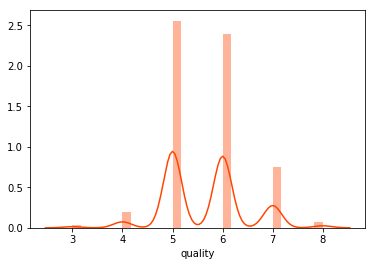

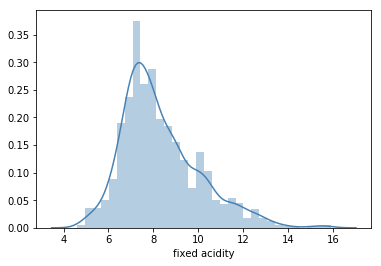

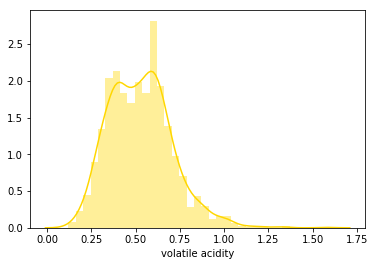

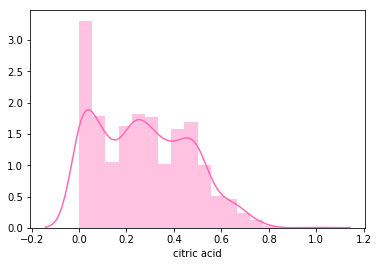

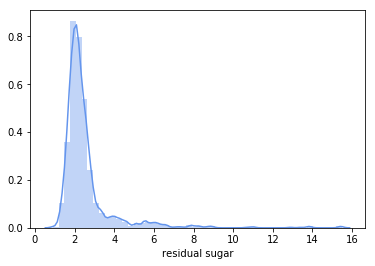

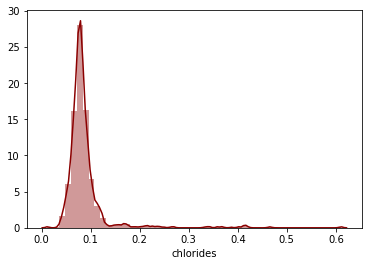

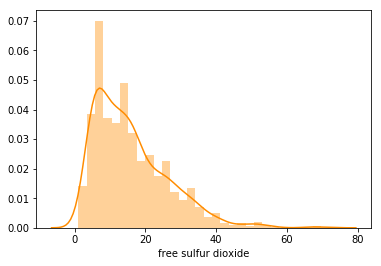

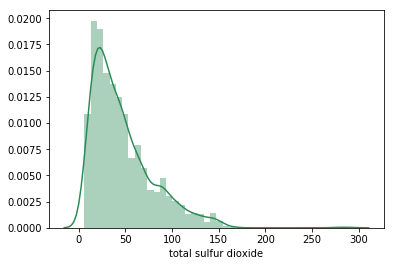

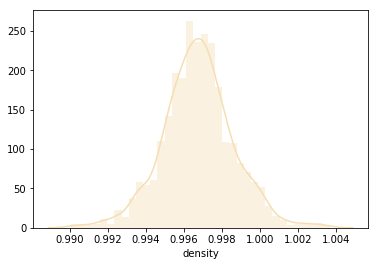

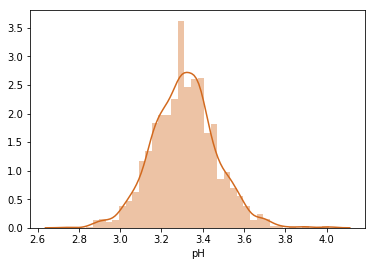

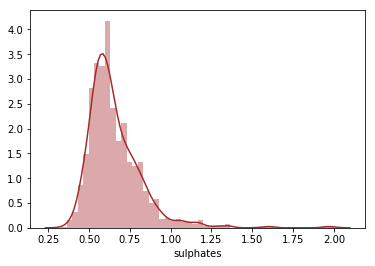

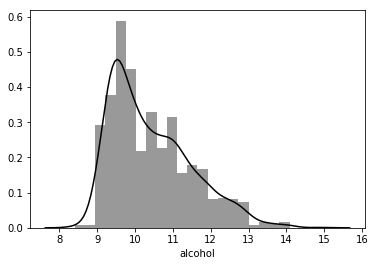

In [63]:
##Code to create a histogram for each column to view distributions
columns=df.columns.tolist()
colors=['orangered','steelblue','gold','hotpink','cornflowerblue','darkred','darkorange','seagreen','wheat','chocolate','brown','black']
scheme={}
for key,val in zip(columns,colors):
    scheme[key]=val
    
def plotter(data,col,scheme):
    plt.figure()
    ax=sns.distplot(data[col],color=scheme[col])
    plt.show()
    
for col in columns:
    plotter(df,col,scheme)  

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


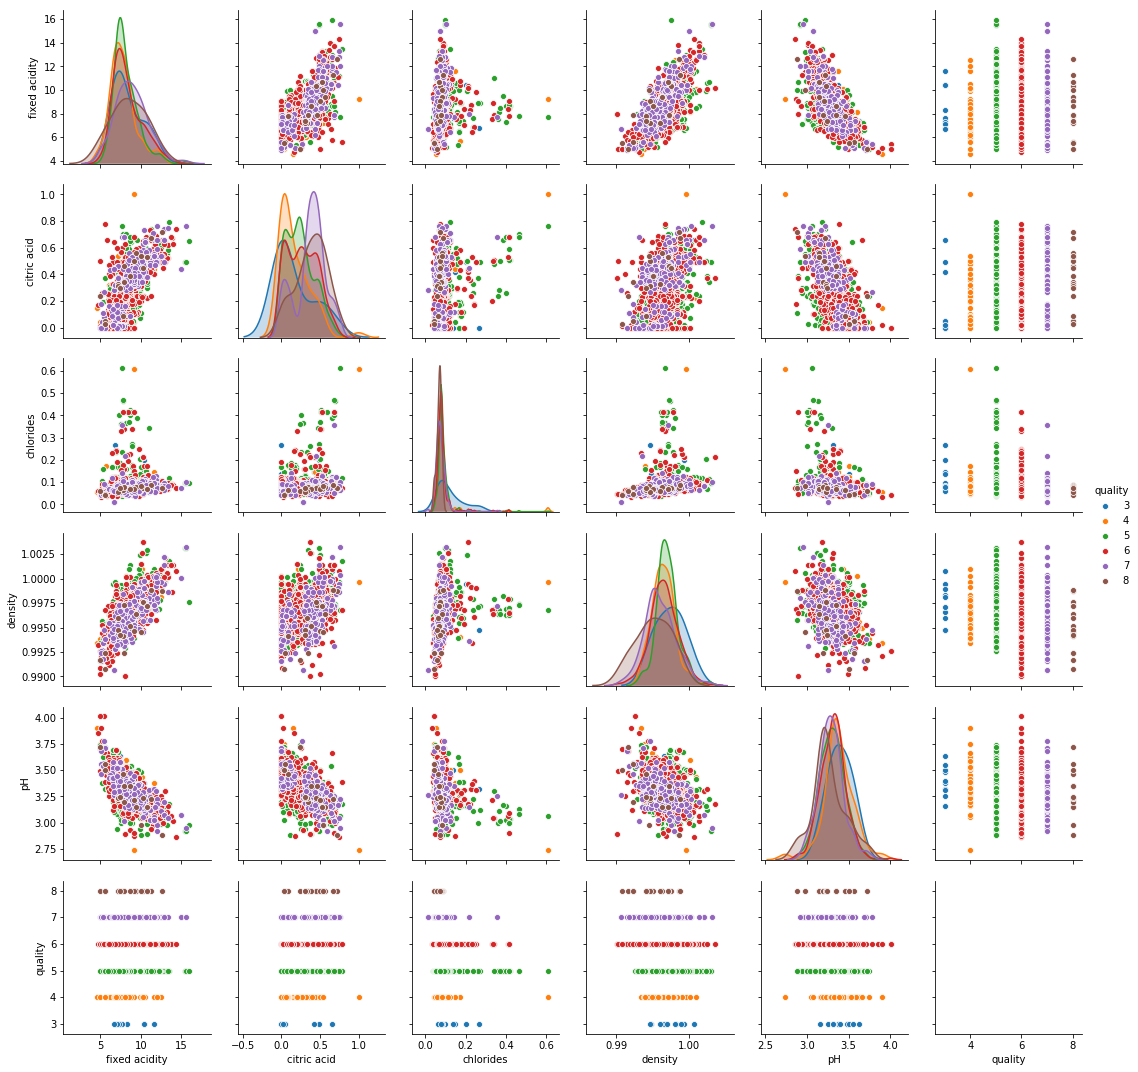

In [142]:
## Maginc Function which shows a bunch of distributions of target variable relative to all features
cols=['fixed acidity','citric acid','chlorides','density','pH','quality']
sns.pairplot(df[cols],hue='quality')


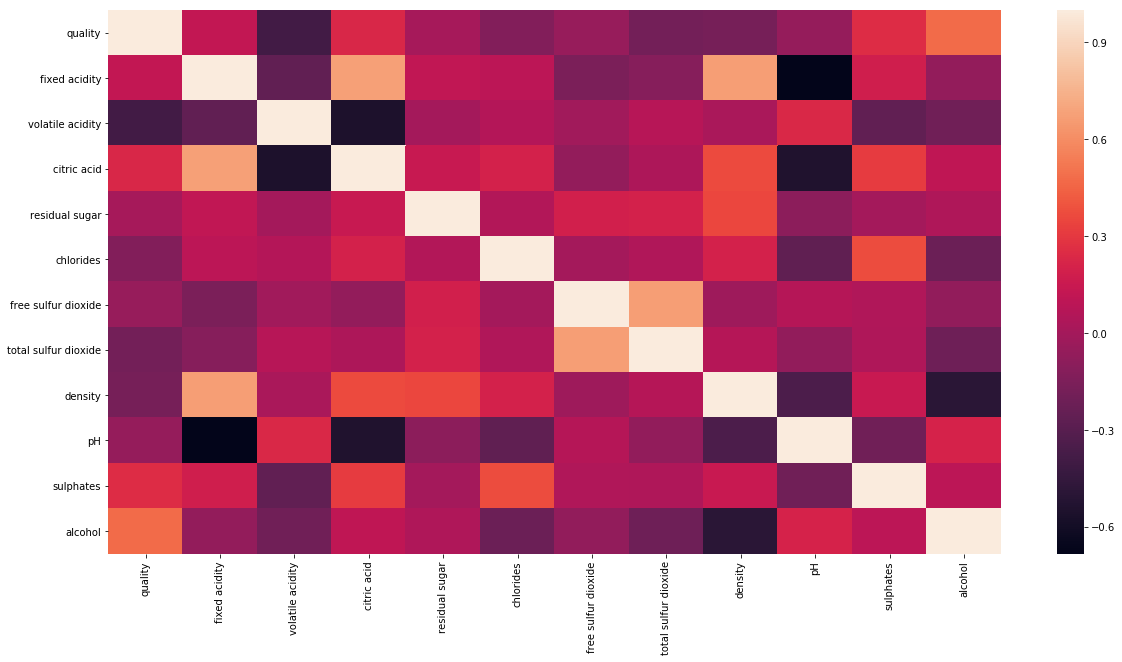

In [125]:
## Correlation plot to show the correlation between quality of the wine and the features 
fig, ax = plt.subplots(figsize=(20,10))
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,xticklabels=correlation_matrix.columns.values,yticklabels=correlation_matrix.columns.values)
plt.show()

# Building Model - Linear Regression 

In [64]:
# Create a LinearRegression Object
lreg = LinearRegression()

In [66]:
# drop target column from df
X_multi = df.drop('quality',1)

# Create a dataframe for target
Y_target = df['quality']

In [68]:
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [76]:
# Set a DataFrame from the Features
coeff_df = pd.DataFrame(X_multi.columns)
coeff_df.columns = ['Features']

# Set a new column lining up the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

# Show correlation coefficients 
coeff_df

,Features,Coefficient Estimate
0,fixed acidity,0.024991
1,volatile acidity,-1.083590
2,citric acid,-0.182564
3,residual sugar,0.016331
4,chlorides,-1.874225
5,free sulfur dioxide,0.004361
6,total sulfur dioxide,-0.003265
7,density,-17.881164
8,pH,-0.413653
9,sulphates,0.916334


In [78]:
## get the b intercept of equation
lreg.intercept_

21.965208449448177

In [99]:
## Get the R^2 Score for the model
print(lreg.score(X_multi,Y_target))

0.3605517030386879


# Evaluating Model

In [106]:
## Split the Data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_multi,Y_target,test_size=0.2, random_state=42)

## Apply a fit
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

## model evaluation for training set

y_train_predict = reg_all.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = reg_all.score(X_train, y_train)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 0.6512995910592836
R2 score is 0.34799261935298625




# Predicting New Data

In [113]:
## Predict a wine with new Data 
wine_prediction=lreg.predict([[9.2, 0.7, 0.56, 1.9, 0.075, 19.0, 60.0, 0.998, 3.16, 0.58, 7.8]])
print(f"this wine receives a quality score of: {wine_prediction}")

this wine receives a quality score of: [4.64509619]


# Feature Engineering 

##TODO